In [1]:
import math
import datetime
import numpy as np
import pandas as pd

from Config import Keys
import Utility.Utility as Utility

from Connector.Client import OrderSide, OrderType
from Connector.Bitmex import Bitmex
from Connector.Kucoin import Kucoin
from Database.Database import Database

from Strategies.FibonacciRetracement import FibonacciRetracement
from Strategies.HeikinAshi import HeikinAshi

In [2]:
DATA_DIR_PATH = "Data/"

In [18]:
exchange = "Kucoin" # input("Exchange: (Bitmex / Kucoin) ")

if exchange == "Kucoin":
    client = Kucoin(public_key=Keys.KUCOIN_PUBLIC_KEY, secret_key=Keys.KUCOIN_SECRET_KEY, phrase=Keys.KUCOIN_PASS_PHRASE, use_testnet=False)
else:
    client = Bitmex(public_key=Keys.BITMEX_PUBLIC_KEY, secret_key=Keys.BITMEX_SECRET_KEY)

In [5]:
database = Database(path=DATA_DIR_PATH)

In [6]:
choice = "collect"#input("Mode: (collect / backtest / trade): ").lower()
symbol = "ETH-USDT"#input("Enter a symbol: ").upper()

if choice == "collect":
    df = database.add_data(client=client, start="2021-11-21T00:00.00Z", symbol=str(symbol))
elif choice == "backtest":
    data = client.get_historical_data(symbol=str(symbol))
    df = database.get_data(client_name=client.name, symbol=str(symbol))
elif choice == "trade":
    pass

Iteration 1: 1101 candles collected | Total candles 1101


In [7]:
df

,open,high,low,close,volume
date,,,,,
2021-11-21 18:19:00+00:00,4221.86,4227.03,4227.71,4221.85,61.368554
2021-11-21 18:18:00+00:00,4215.09,4222.94,4226.11,4204.20,425.424298
2021-11-21 18:17:00+00:00,4223.96,4215.14,4226.35,4214.31,107.947554
2021-11-21 18:16:00+00:00,4222.17,4223.96,4226.80,4216.92,81.558597
2021-11-21 18:15:00+00:00,4209.55,4221.53,4223.51,4206.00,216.059805
...,...,...,...,...,...
2021-11-21 00:04:00+00:00,4371.19,4368.46,4371.19,4368.15,17.412608
2021-11-21 00:03:00+00:00,4370.88,4371.19,4371.67,4370.74,6.286641
2021-11-21 00:02:00+00:00,4371.65,4370.89,4371.65,4370.00,23.740315


In [19]:
# For date comparing
i_date = df.index.view(np.int64)
i_date[4] > i_date[5]

True

In [13]:
resampled_df = Utility.resample_dataframe(df, time_frame="30m")
resampled_df

,open,high,low,close,volume
date,,,,,
2021-11-21 00:00:00+00:00,4367.25,4371.66,4356.92,4356.40,543.059645
2021-11-21 00:30:00+00:00,4356.39,4380.89,4356.60,4378.57,676.157429
2021-11-21 01:00:00+00:00,4380.90,4377.66,4362.19,4361.42,763.604233
2021-11-21 01:30:00+00:00,4361.81,4368.71,4352.28,4350.01,608.507945
2021-11-21 02:00:00+00:00,4350.02,4353.17,4336.86,4346.65,831.408961
2021-11-21 02:30:00+00:00,4348.81,4367.49,4340.58,4338.74,633.024518
2021-11-21 03:00:00+00:00,4339.62,4357.81,4337.95,4357.72,478.601303
2021-11-21 03:30:00+00:00,4357.81,4356.20,4345.48,4349.09,408.799268
2021-11-21 04:00:00+00:00,4350.58,4356.33,4345.98,4345.85,442.588507


In [14]:
fib_strategy = FibonacciRetracement(resampled_df)
fib_strategy.backtest()

In [15]:
fib_strategy.dataframe

,open,high,low,close,volume,buy_and_hold_returns,buy_and_hold_creturns,macd,signal_line,buy_signal_price,sell_signal_price
date,,,,,,,,,,,
2021-11-21 00:00:00+00:00,4367.25,4371.66,4356.92,4356.40,543.059645,NaN,NaN,0.000000,0.000000,NaN,NaN
2021-11-21 00:30:00+00:00,4356.39,4380.89,4356.60,4378.57,676.157429,0.005089,1.005102,1.768547,0.353709,NaN,NaN
2021-11-21 01:00:00+00:00,4380.90,4377.66,4362.19,4361.42,763.604233,-0.003917,1.001173,1.765915,0.636151,NaN,NaN
2021-11-21 01:30:00+00:00,4361.81,4368.71,4352.28,4350.01,608.507945,-0.002616,0.998557,0.833529,0.675626,NaN,NaN
2021-11-21 02:00:00+00:00,4350.02,4353.17,4336.86,4346.65,831.408961,-0.000772,0.997786,-0.174505,0.505600,NaN,NaN
2021-11-21 02:30:00+00:00,4348.81,4367.49,4340.58,4338.74,633.024518,-0.001820,0.995972,-1.593285,0.085823,NaN,NaN
2021-11-21 03:00:00+00:00,4339.62,4357.81,4337.95,4357.72,478.601303,0.004375,1.000339,-1.172633,-0.165868,NaN,NaN
2021-11-21 03:30:00+00:00,4357.81,4356.20,4345.48,4349.09,408.799268,-0.001980,0.998359,-1.518132,-0.436321,NaN,NaN
2021-11-21 04:00:00+00:00,4350.58,4356.33,4345.98,4345.85,442.588507,-0.000745,0.997616,-2.029983,-0.755053,NaN,NaN


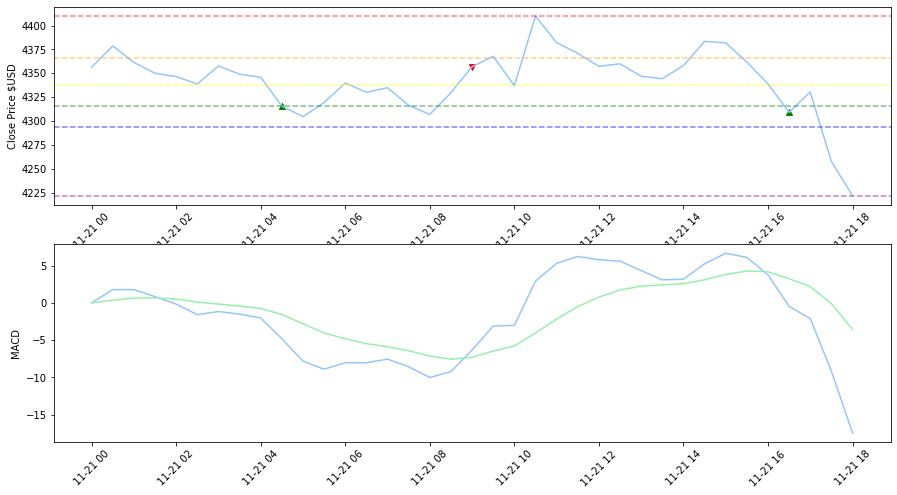

In [16]:
fib_strategy.plot_buy_and_sell()